In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [2]:
df_basic_release = pd.read_csv('../independent_metrics/basic_release.csv', index_col='bug_id')
df_basic_beta = pd.read_csv('../independent_metrics/basic_beta.csv', index_col='bug_id')
df_basic_aurora = pd.read_csv('../independent_metrics/basic_aurora.csv', index_col='bug_id')

df_bug_inducing = pd.read_csv('../independent_metrics/bug_inducing.csv', index_col='bug_id')

df_release = pd.merge(df_basic_release, df_bug_inducing, left_index=True, right_index=True)
df_beta = pd.merge(df_basic_beta, df_bug_inducing, left_index=True, right_index=True)
df_aurora = pd.merge(df_basic_aurora, df_bug_inducing, left_index=True, right_index=True)

In [3]:
df_release.shape

(323, 32)

In [4]:
df_beta.shape

(2710, 32)

In [5]:
df_aurora.shape

(4570, 32)

In [6]:
df_release = df_release[df_release['uplift_accepted'] == True]
df_beta = df_beta[df_beta['uplift_accepted'] == True]
df_aurora = df_aurora[df_aurora['uplift_accepted'] == True]

In [7]:
df_release = df_release[df_release.component != 'Pocket']

In [8]:
df_release.shape

(230, 32)

In [9]:
df_beta.shape

(2477, 32)

In [10]:
df_aurora.shape

(4507, 32)

In [11]:
df_release.component = df_release.component.apply(lambda x: x.split(':')[0])
df_beta.component = df_beta.component.apply(lambda x: x.split(':')[0])
df_aurora.component = df_aurora.component.apply(lambda x: x.split(':')[0])

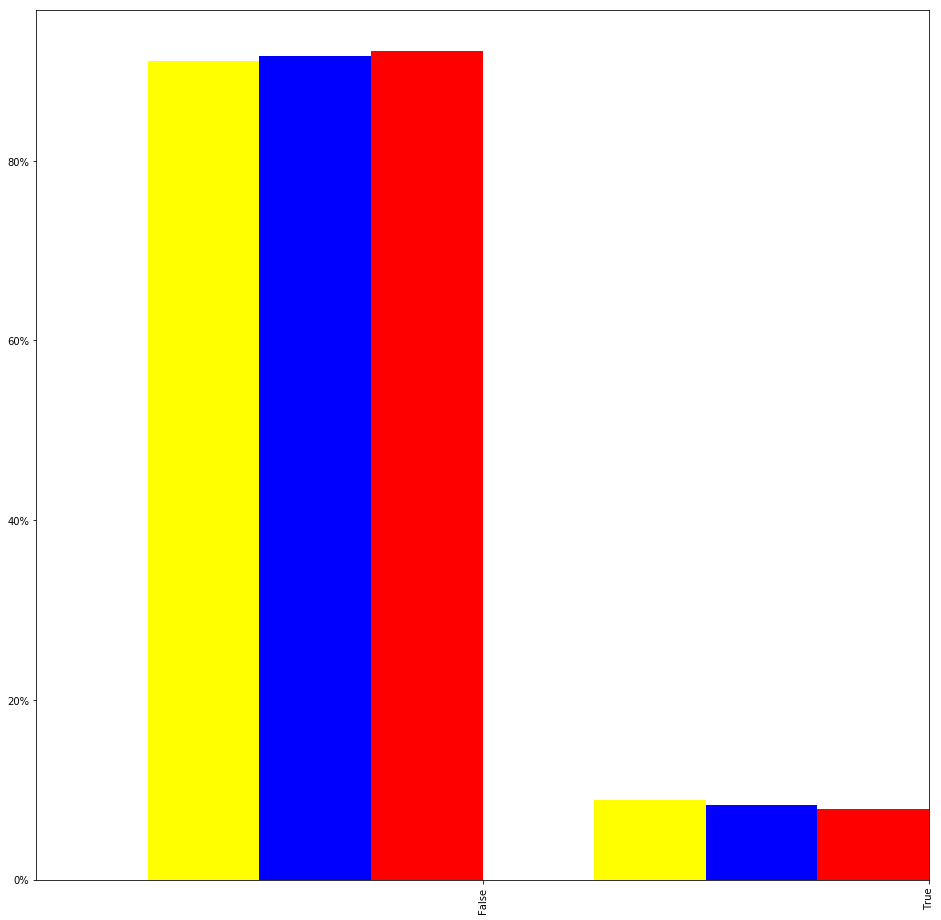

In [12]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
df_release['error_inducing'].value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=1, width=0.25)
df_beta['error_inducing'].value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=2, width=0.25)
df_aurora['error_inducing'].value_counts(normalize=True).plot(kind='bar', color="yellow", ax=ax, position=3, width=0.25)
plt.show()

## Release uplifts

### Bug-inducing vs non-bug-inducing uplifts per component

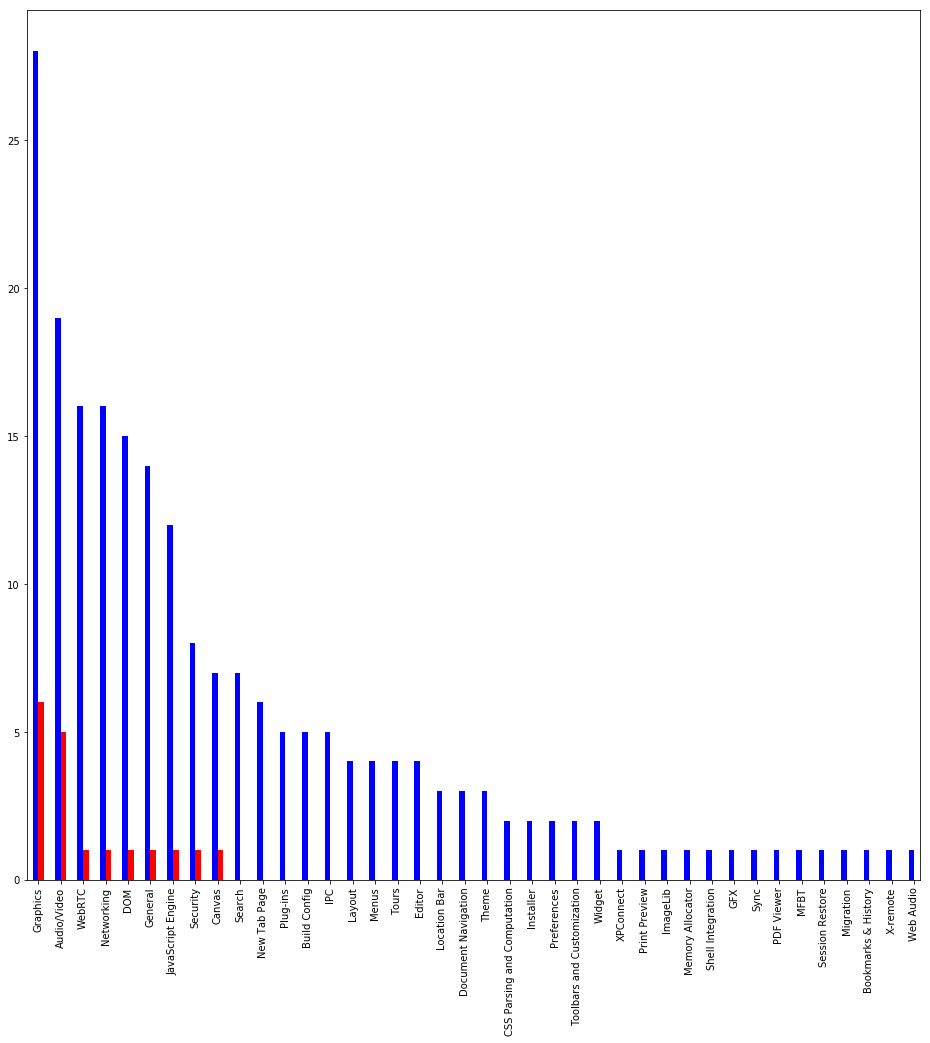

In [13]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
df_release[df_release['error_inducing'] == True].component.value_counts().plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
df_release[df_release['error_inducing'] == False].component.value_counts().plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

### Bug-inducing vs non-bug-inducing uplifts per bug type

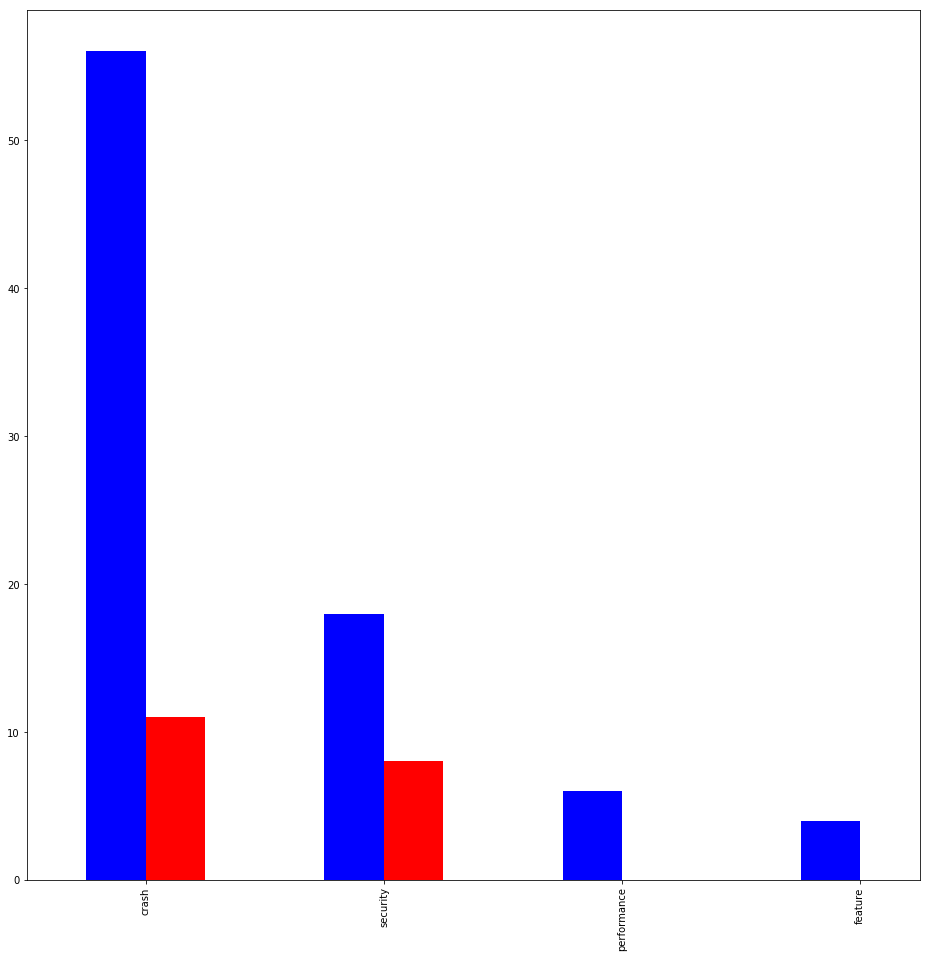

In [14]:
types_bug_inducing = df_release[df_release['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing.index = types_bug_inducing.index.droplevel(-1)
types_bug_inducing.name = 'Type'
types_non_bug_inducing = df_release[df_release['error_inducing'] == False].types.str.split('^').apply(pd.Series, 1).stack()
types_non_bug_inducing.index = types_non_bug_inducing.index.droplevel(-1)
types_non_bug_inducing.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
types_bug_inducing.value_counts().plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
types_non_bug_inducing.value_counts().plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

## Beta uplifts

### Bug-inducing vs non-bug-inducing uplifts per component

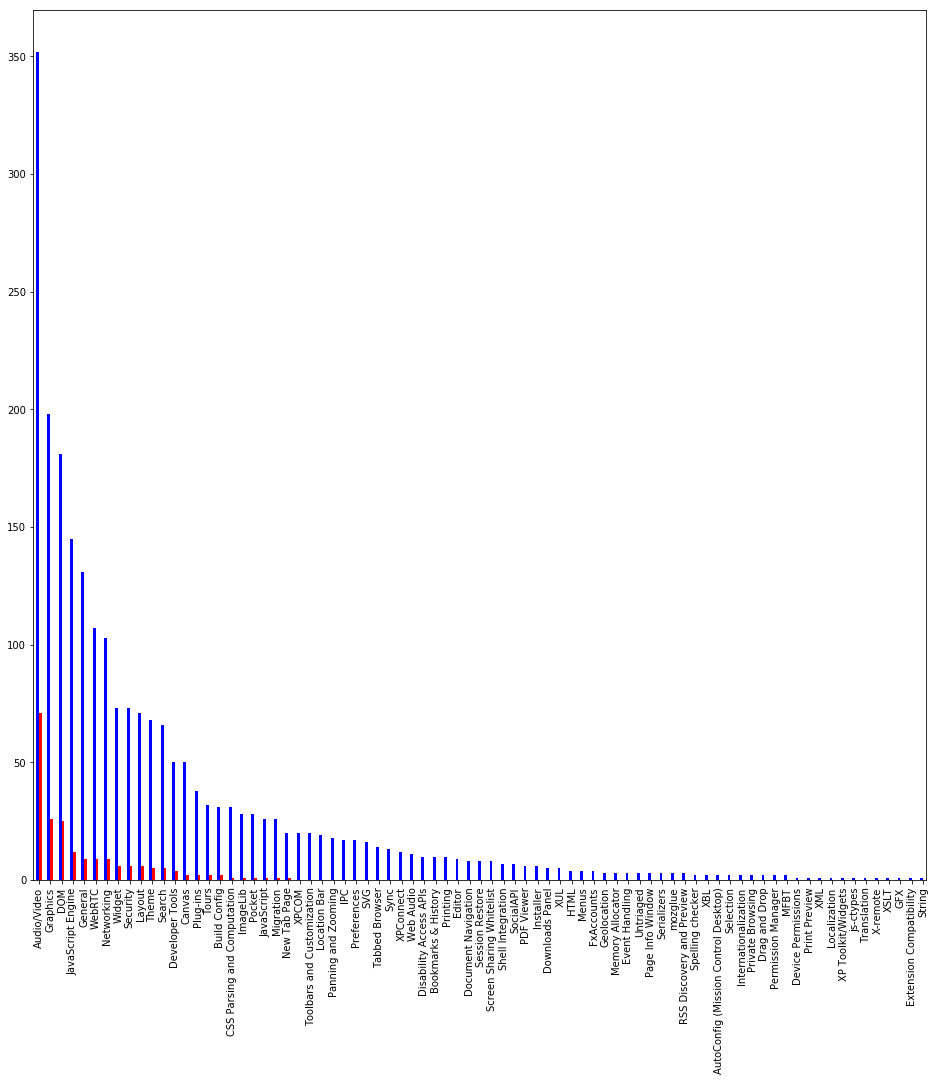

In [15]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
df_beta[df_beta['error_inducing'] == True].component.value_counts().plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
df_beta[df_beta['error_inducing'] == False].component.value_counts().plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

### Bug-inducing vs non-bug-inducing uplifts per bug type

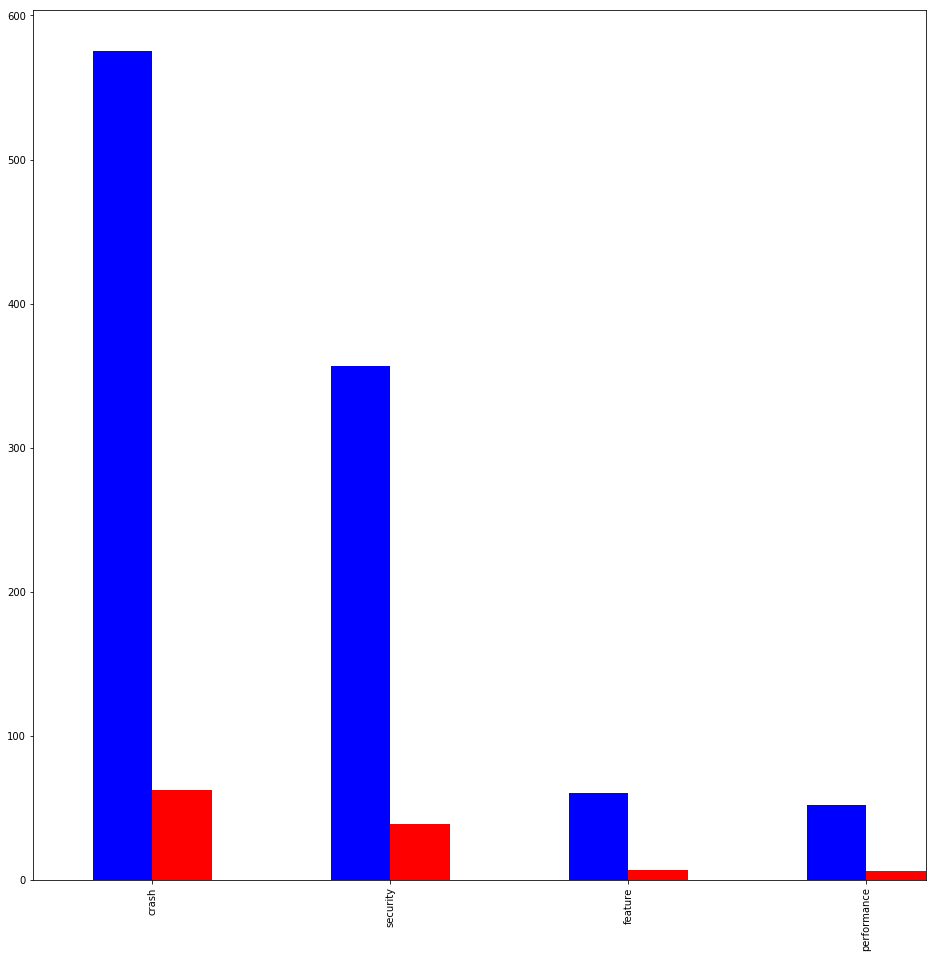

In [16]:
types_bug_inducing = df_beta[df_beta['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing.index = types_bug_inducing.index.droplevel(-1)
types_bug_inducing.name = 'Type'
types_non_bug_inducing = df_beta[df_beta['error_inducing'] == False].types.str.split('^').apply(pd.Series, 1).stack()
types_non_bug_inducing.index = types_non_bug_inducing.index.droplevel(-1)
types_non_bug_inducing.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
types_bug_inducing.value_counts().plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
types_non_bug_inducing.value_counts().plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

## Aurora uplifts

### Bug-inducing vs non-bug-inducing uplifts per component

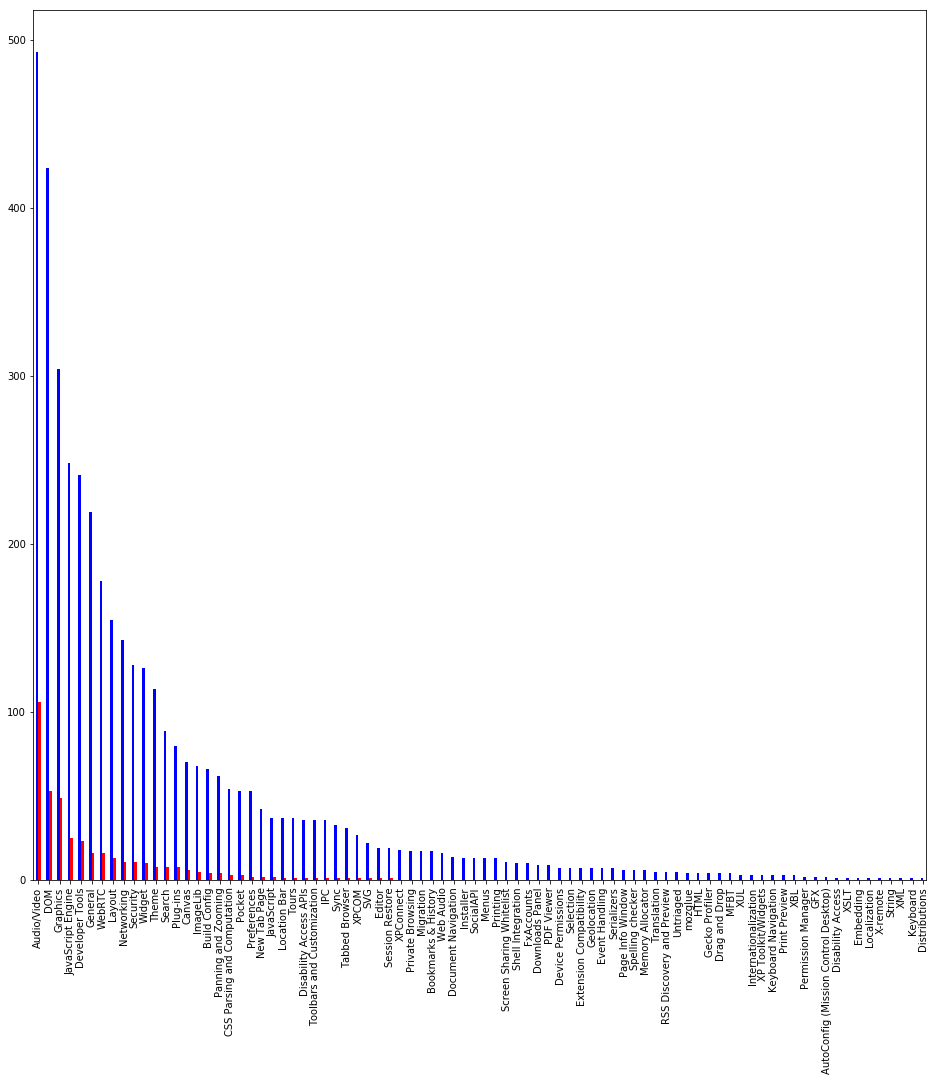

In [17]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
df_aurora[df_aurora['error_inducing'] == True].component.value_counts().plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
df_aurora[df_aurora['error_inducing'] == False].component.value_counts().plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

### Bug-inducing vs non-bug-inducing uplifts per bug type

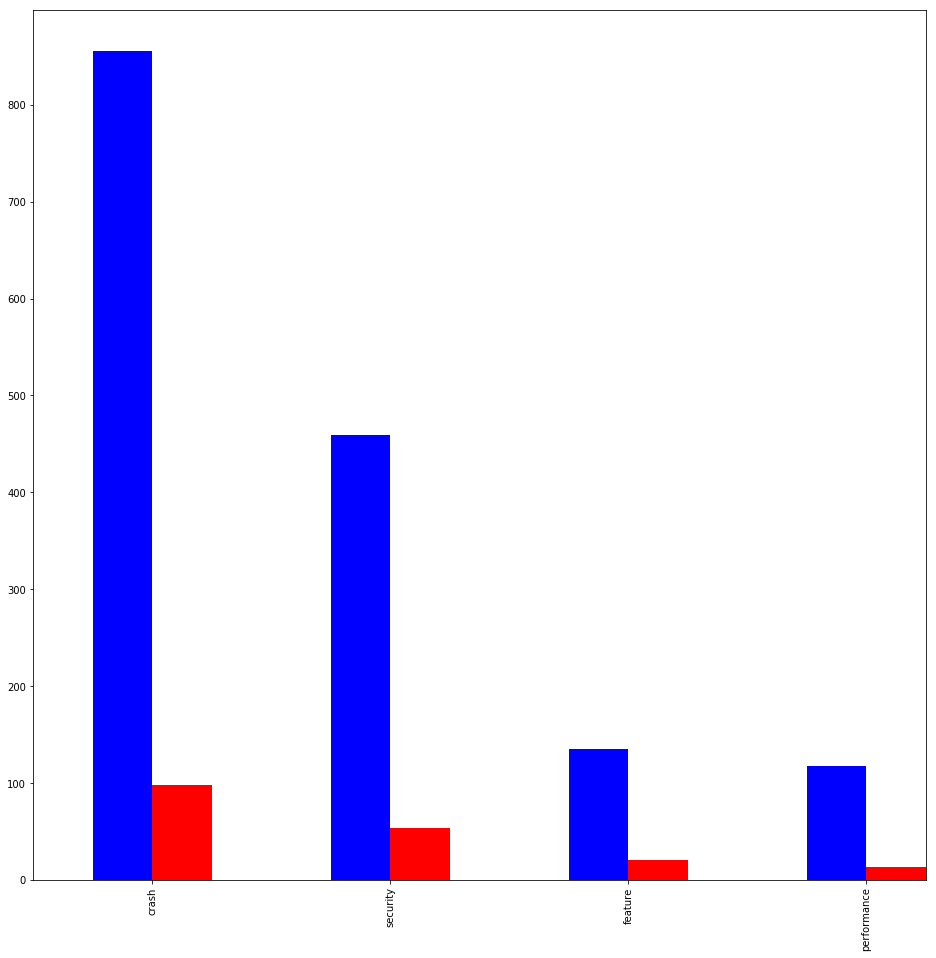

In [18]:
types_bug_inducing = df_aurora[df_aurora['error_inducing'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_bug_inducing.index = types_bug_inducing.index.droplevel(-1)
types_bug_inducing.name = 'Type'
types_non_bug_inducing = df_aurora[df_aurora['error_inducing'] == False].types.str.split('^').apply(pd.Series, 1).stack()
types_non_bug_inducing.index = types_non_bug_inducing.index.droplevel(-1)
types_non_bug_inducing.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
types_bug_inducing.value_counts().plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
types_non_bug_inducing.value_counts().plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()